## **Assignment 3**
---

**Author:** Anthony Stachowski  
**NetID**: astacho1  

### **Instructions**
This assignment includes a series of questions designed to help you practice the fundamentals of data analytics in Python. For each question, provide a complete answer below it using code cell(s). Be sure your answers are sensible, code-based (e.g., programmatic as opposed to hard-coded) and provide sufficient comments for clarity.

Before you begin, be sure to do the following to help identify your submission:

1. Rename this Jupyter Notebook to include your last/first name (e.g., 70260-03_Assignment3_Dobolyi_David.ipynb).
2. Fill in your name and NetID (e.g., ddobolyi) at the top of this Notebook.

Your final submission to Blackboard must contain two files:

1. This Notebook with your completed answers, which runs from top-to-bottom without errors (e.g., 70260-03_Assignment3_Dobolyi_David.ipynb).
2. An HTML export of this Notebook (e.g., 70260-03_Assignment3_Dobolyi_David.html).

After completing the assignment, to ensure your solution is complete and to generate the HTML export, be sure to:

1. Perform a full reset of your Notebook to double-check that your submission is fully working. To do this, go to Kernel -> Restart Kernel and Run All Cells... in the main menu.
2. Generate a HTML export using File -> Export Notebook As... -> Export Notebook to HTML in the main menu.

Finally, to upload your files to Sakai, you may need to zip them first, particularly when it comes to the HTML portion of the submission. For instructions on how to zip a file, see the following [link](https://www.sweetwater.com/sweetcare/articles/how-to-zip-and-unzip-files/) for visual examples.

##### **Data** 
A file named bank-additional.zip (the [Bank Marketing Data Set](http://archive.ics.uci.edu/ml/datasets/bank+marketing) from the UCI Machine Learning Repository) is provided with this assignment. Unzip it to find the data files you will need to answer several of the questions below.

##### **Notes**

1. Assignment 3 is individual work -- please do not collaborate with others while completing this assignment.
2. You are encouraged to copy and adapt code from the class scripts to help solve this assignment.
3. Be sure to run the [Setup](#Setup) to complete the assignment.

### **Imports**

The following code cell contains some basic package installation steps and imports to help get you started and help with several of the questions below.

Place any additional imports you need in the relevant cell below as you continue to work on the assignment.

In [1]:
# install packages (if needed)

#!conda install numpy pandas seaborn scikit-learn --y
# or
# !pip install numpy pandas seaborn scikit-learn --quiet

In [1]:
# package imports

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.svm import SVC

In [2]:
# set up seaborn plots
sns.set(rc = {'figure.figsize': (7, 6)},
        font_scale = 1.25) # increase text size on plots (e.g., axis labels)
sns.set_style('whitegrid')

### **Setup**

Place your solution (i.e., this script) and the unzipped data files (i.e., bank-additional-full.csv, bank-additional-names.txt, and bank-additional.csv) into one folder and then run the following code cell to get your analysis started:

In [3]:
# read data set notes
notes = open('bank-additional-names.txt', 'r')
print(notes.read())
notes.close()

# load data
dat = pd.read_table('bank-additional-full.csv', sep = ';').drop(columns = 'duration') # see note below regarding why this column is dropped

ï»¿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: SÃ©rgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   T

### **Question 1**

In the setup code above, the data were placed in a variable named *dat*. Show the following properties of the data:

1. the first five rows of the data
2. the dimensions (number of rows and columns)
3. the data types (e.g., float64)

In [4]:
# The First Five Rows of Data
dat.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# The dataset dimensions
dat.shape

(41188, 20)

In [6]:
# The dataset data types
dat.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Additional Analysis of pdays**

<AxesSubplot:xlabel='pdays', ylabel='Count'>

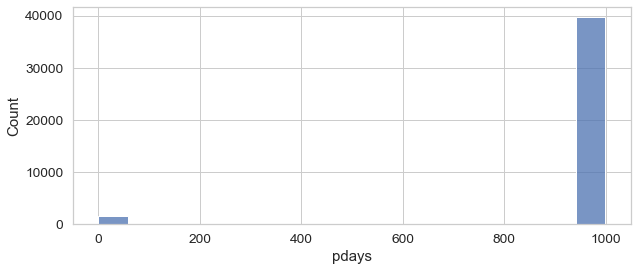

In [7]:
# I noticed that the feature 'pdays' uses 999 for cases where the client was not previously contacted
# I wanted to just do some brief analysis to better understand the distribution of this data as it could impact the model results
plt.figure(figsize = (10, 4))
sns.histplot(dat, x="pdays")
# The data set is heavily dominate by 999 cases, therefore it looks like most clients in the data set have not been previously contacted
# More analysis would need to be done to assess if this could be accounted for in a better way by separating these cases out

### **Question 2**

Based on the notes that came with the data set (i.e., see above), there is a predefined "target variable" (see above) provided for you (i.e., **y**). Plot the counts of cases in this variable using seaborn and then:

1. explain what this variable tells us about client behavior (you may quote directly from the notes above)
2. explain what type of variable it is
3. explain what type of predictive model could be used to make predictions about it

<AxesSubplot:xlabel='y', ylabel='count'>

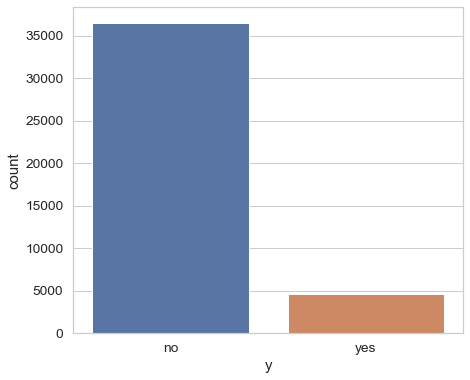

In [8]:
sns.countplot(x = 'y', 
              data = dat)

*Answers:*
1. The desired target variable **y** tells us whether the client has suscribed to a term deposit with the bank.

2. This variable is binary with two levels: yes or no.

3. A binary classification model on the target variable **y** could be used to make predictions based on the other features in the dataset.

### **Question 3**

You will now perform predictive modeling using scikit-learn (sklearn). As the first step, using sklearn's [***train_test_split***](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, split the data into a stratified training and test subsets such that 75% of the data are used for training and 25% for testing.

In [9]:
Train, Test = train_test_split(dat, 
                               stratify = dat.y,
                               test_size = 0.25, 
                               random_state = 345)

### **Question 4**

Show the counts of cases in the target variable for both the train and test split from the previous question.

In [10]:
display(Train.groupby('y').size())

y
no     27411
yes     3480
dtype: int64

In [11]:
display(Test.groupby('y').size())

y
no     9137
yes    1160
dtype: int64

### **Question 5**

It's important to consider class balance for the target variable. To help make this easier to see, rather than the counts, show the proportions (i.e., overall percentages) of cases for the target variable in both the train and test splits.

In [12]:
round(Train.groupby('y').size()/len(Train), 3)

y
no     0.887
yes    0.113
dtype: float64

In [13]:
round(Test.groupby('y').size()/len(Test), 3)

y
no     0.887
yes    0.113
dtype: float64

### **Question 6**

Are the classes heavily imbalanced in the training data? If so, create a downsampled version of the training data you'll use for the rest of the analysis (if not, no need to perform this step).

Regardless of whether you ultimately downsampled or not, show the final dimensions (number of rows and columns) in the training data. Moreover, if you did downsample, also show the count and proportion of cases remaining in the training data.

In [14]:
np.random.seed(345) # to create reproducible results

maj_class = np.where(Train.y == 'no')[0]
min_class = np.where(Train.y == 'yes')[0]

resample = np.random.choice(maj_class, size = len(min_class), replace = False)

TrainDS = pd.concat([Train.iloc[min_class], Train.iloc[resample]])

TrainDS.shape

(6960, 20)

In [15]:
display(TrainDS.groupby('y').size())
round(TrainDS.groupby('y').size()/len(TrainDS), 3)

y
no     3480
yes    3480
dtype: int64

y
no     0.5
yes    0.5
dtype: float64

### **Question 7**

It's time to start preprocessing the training data for building your predictive models. To get started, show whether the training data contains any missing values or not.

Are there missing values? If so, perform median imputation for continuous variables and constant imputation for categorical variables using sklearn's [***SimpleImputer***](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html). If not, move on to the next step.

In [16]:
round(1 - len(TrainDS.dropna())/len(TrainDS), 3)

# There are no missing data for the training set

0.0

### **Question 8**

Encode all categorical (or non-continuous) data in the training data into binary columns using sklearn's [***OneHotEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and show the first five rows of the training data after encoding.

**Note:** you should not encode the target variable!

In [17]:
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'y').select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_Enc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_Enc.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
39021,56,1,999,0,-3.0,92.713,-33.0,0.714,5023.5,yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
40377,34,1,10,2,-1.7,94.027,-38.3,0.900,4991.6,yes,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
40498,36,6,999,0,-1.7,94.027,-38.3,0.898,4991.6,yes,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37987,45,1,3,2,-3.4,92.379,-29.8,0.797,5017.5,yes,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18587,39,4,999,0,1.4,93.918,-42.7,4.968,5228.1,yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### **Question 9**

Use sklearn's [***VarianceThreshold***](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) function to remove any columns from the training data that happen to have zero variance at this point.

Show the first five rows of the training data after performing this step.

In [18]:
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_Enc.drop(columns = 'y')

selector = selector.fit(sel_raw_data_train)

selected_data_train = pd.DataFrame(selector.transform(sel_raw_data_train))

selected_data_train.columns = sel_raw_data_train.columns
selected_data_train.index = sel_raw_data_train.index

TrainDS_EncSel = pd.concat([TrainDS_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_EncSel.head(5)

,y,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
39021,yes,56.0,1.0,999.0,0.0,-3.0,92.713,-33.0,0.714,5023.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
40377,yes,34.0,1.0,10.0,2.0,-1.7,94.027,-38.3,0.900,4991.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
40498,yes,36.0,6.0,999.0,0.0,-1.7,94.027,-38.3,0.898,4991.6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37987,yes,45.0,1.0,3.0,2.0,-3.4,92.379,-29.8,0.797,5017.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18587,yes,39.0,4.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### **Question 10**

Use sklearn's [***RobustScaler***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) to scale all of the data in the data set except the target variable.

Show the first five rows of the training data after performing this step.

In [19]:
scaler = RobustScaler()

sca_raw_data_train = TrainDS_EncSel.drop(columns = 'y').select_dtypes(exclude = ['object', 'category'])

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

TrainDS_EncSelSca = pd.concat([TrainDS_EncSel.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

TrainDS_EncSelSca.head(5)

,y,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
39021,yes,1.058824,-0.5,0.0,0.0,-0.90625,-0.663942,1.396825,-0.890175,-1.102699,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40377,yes,-0.235294,-0.5,-989.0,2.0,-0.50000,0.529519,0.555556,-0.840108,-1.312706,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0
40498,yes,-0.117647,2.0,0.0,0.0,-0.50000,0.529519,0.555556,-0.840646,-1.312706,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37987,yes,0.411765,-0.5,-996.0,2.0,-1.03125,-0.967302,1.904762,-0.867833,-1.142199,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
18587,yes,0.058824,1.0,0.0,0.0,0.46875,0.430518,-0.142857,0.254913,0.244240,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **Question 11**

Apply any relevant preprocessing steps you performed in Questions 7-10 to the test data using settings based on the training data to avoid leakage.

Show the first five rows of the test data after performing this step.

In [20]:
round(1 - len(Test.dropna())/len(Test), 3)

# There are no missing data for the testing set, so no imputation using training set is required.

0.0

In [21]:
# One hot encoding

enc_raw_data_test = Test.drop(columns = 'y').select_dtypes(include = ['object', 'category'])

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

Test_Enc = pd.concat([Test.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)

# Accounting for no variance in columns did not remove any from the training set and this does not need to be done on the testing set.

# Scaling

sca_raw_data_test = Test_Enc.drop(columns = 'y').select_dtypes(exclude = ['object', 'category'])

scaled_data_test = pd.DataFrame(scaler.transform(sca_raw_data_test))

scaled_data_test.columns = sca_raw_data_test.columns
scaled_data_test.index = sca_raw_data_test.index

Test_EncSca = pd.concat([Test_Enc.drop(sca_raw_data_test.columns, axis = 1), scaled_data_test], axis = 1)

# Final Result

Test_EncSca.head(5)

,y,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
39548,no,-0.117647,-0.5,0.0,0.0,-0.53125,0.277021,1.142857,-0.904980,-1.200132,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38752,no,-0.058824,1.0,-993.0,1.0,-1.03125,-0.722071,1.857143,-0.889906,-1.142199,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0
24182,no,-0.058824,-0.5,0.0,0.0,0.00000,-0.221617,-0.031746,0.045760,0.031600,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39692,yes,2.117647,-0.5,0.0,0.0,-0.53125,0.392371,0.285714,-0.897174,-1.200132,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26381,no,1.176471,-0.5,0.0,0.0,0.00000,-0.221617,-0.031746,0.014805,0.031600,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **Question 12**

Fit the following models to the training data:
    
1. Decision Tree
2. AdaBoost
3. Random Forest
4. One other model of your choice! **(although see notes)**

As part of this process, be sure to:

- Tune your models using various hyperparameter settings (e.g., using sklearn's [***GridSearchCV***](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))
- Choose a relevant [scoring metric](https://scikit-learn.org/stable/modules/model_evaluation.html) for your model search (e.g., accuracy, AUC, etc.)
- Generate predictions and prediction probabilities using your test data
- Compute a balanced accuracy score, AUC score, and false/true positive rates for the best version of each of your models
- Store the refit times for the best version of each of your models

**Notes:** 

- Model fitting may generally take a several minutes to run -- this is normal!
- If you choose to use [***SVC***](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), you may want to tune it with only a small number of parameters (e.g., 2 or 3 settings involving C) as it runs **very** slowly on these data (i.e., it may take half an hour or more depending on your computer). Other models may not have this slowness issue.

In [22]:
# set up data and labels
X_train = TrainDS_EncSelSca.drop(columns = 'y')
y_train = TrainDS_EncSelSca.y

X_test = Test_EncSca.drop(columns = 'y')
y_test = Test_EncSca.y

pos_label = 'yes'

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Linear SVM']
classifiers = [DecisionTreeClassifier(random_state = 345), 
               AdaBoostClassifier(random_state = 345), 
               RandomForestClassifier(random_state = 345), 
               SVC(random_state = 345, kernel = 'linear', probability = True)]
param_grids = [{'max_depth': [2, 3, 4, 5, 10, 15], 'criterion': ['gini', 'entropy']},
               {'n_estimators': [50, 100, 200]},
               {'max_depth': [2, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 200]}, 
               {'C': [0.5, 1]}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 4: Decision Tree
Now working on model 2 of 4: AdaBoost
Now working on model 3 of 4: Random Forest
Now working on model 4 of 4: Linear SVM
Finished!


### **Question 13**

Create a pandas DataFrame using the results of your modeling fitting and show the Refit Time, Balanced Accuracy, and AUC for the best version of each of your models, sorted descending by AUC.

In [23]:
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values('AUC', ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
1,AdaBoost,2.804,0.741,0.790
2,Random Forest,0.281,0.734,0.787
3,Linear SVM,115.027,0.729,0.772
0,Decision Tree,0.070,0.730,0.771


### **Question 14**

Based on the results shown in Question 13 above, answer the following questions:
    
1. Which of your models performed the best overall based on AUC? (treat this as your best overall model)
2. Was your best overall model based on AUC also the best in terms of balanced accuracy?
3. How fast did your best model run relative to the others?
4. What is a good link (e.g., article, web page, blog entry) that provides a basic overview of how your best model works? (feel free to use [Google](https://www.google.com/) to find a relevant link)

**Answers**

1. Based on AUC, AdaBoost perfomed best.
2. Yes, AdaBoost also performed best on the basis of balanced accuracy.
3. The AdaBoost was faster than Linear SVM, but slower than the Random Forest model and the Decision Tree Model.  It Ranked 3rd fastest, behind Random Forest (2nd) and Decision Tree (1st).
4. The following site gives a good explanation of AdaBoost along with giving some of its strengths and weaknesses:\
https://blog.paperspace.com/adaboost-optimizer/

### **Question 15**

Show the final parameter settings for your best overall model.

In [24]:
best_index = results.index[0]
models[best_index].best_estimator_

AdaBoostClassifier(n_estimators=200, random_state=345)

### **Question 16**

To help visualize your modeling results, show a bar plot comparing your models based on AUC and colored by Refit Time.

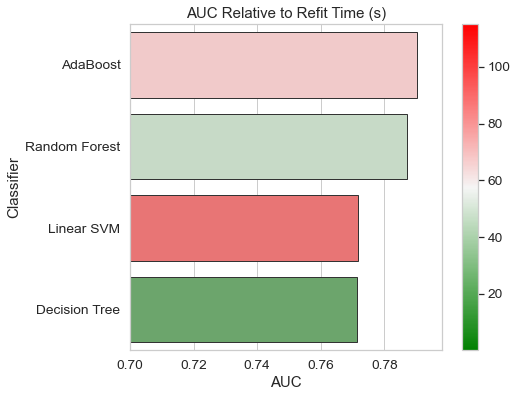

In [25]:
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()

### **Question 17**

Plot ROC curves for each of your models in one figure.

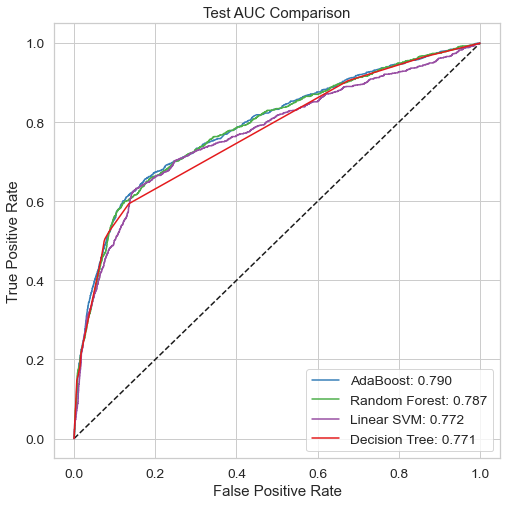

In [26]:
# defining a custom function for reuse later
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        plot_roc_curve(models[i], 
                       X_test, 
                       y_test, 
                       color = cm.Set1(i), 
                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']),  
                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

### **Question 18**

Plot a confusion matrix for your best overall model and generate a classification report (i.e., using sklearn's [***classification_report***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). Use the latter to answer the following questions regarding your best overall model:

1. What was the accuracy?
2. What was the balanced accuracy?
3. What was the sensitivity score?
4. What was the specificity score?

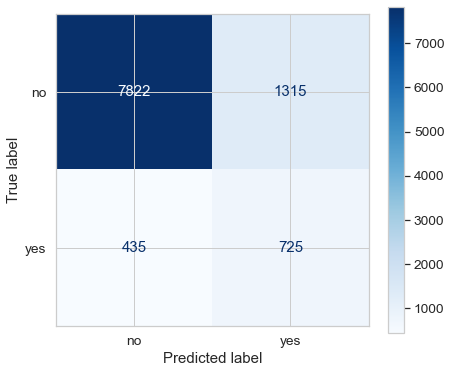

In [27]:
plot_confusion_matrix(models[best_index], 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues,
                      values_format = 'd')

In [28]:
print(classification_report(y_test, preds[best_index], digits = 3))

              precision    recall  f1-score   support

          no      0.947     0.856     0.899      9137
         yes      0.355     0.625     0.453      1160

    accuracy                          0.830     10297
   macro avg      0.651     0.741     0.676     10297
weighted avg      0.881     0.830     0.849     10297



**Answers**

1. Accuracy = 0.830
2. Balanced Accuracy = 0.741
3. Sensitivity = 0.625
4. Specificity = 0.856

### **Question 19**

Plot the top 10 features of importance (i.e., `feature_importances_`) or coefficients (i.e., `coefs_`) for your best overall model.

<AxesSubplot:xlabel='importance', ylabel='feature'>

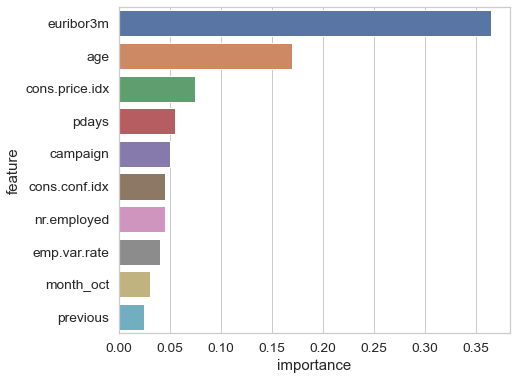

In [29]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional)
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))

### **Question 20**

Using a markdown cell, describe the overall findings of your analysis, focusing on the figures you generated in Questions 16-19 above and the results/answers from Questions 13 and 14, respectively. Feel free to reference figures by referring to the questions above (e.g., as shown in the figure in Q16 above...).

The following questions may be useful for putting together your write-up:

- What kind of data were you analyzing (e.g., How many rows/columns? What was the target variable? What were the predictors?)
- What type of analysis did you conduct?
- Were any data preparation/preprocessing steps necessary?
- What types of models did you try evaluating?
- How well were you able to predict the target variable?
- What were important features or coefficients for prediction in your best model and what do they mean from a business perspective?
- What is the overarching business impact of your analysis (e.g., do you have any prescriptive recommendations)?
- What did you learn from your analysis?

**Note:** Your write-up does not need to be long (i.e., there is no length requirement), but it should cover all of the questions noted above. Be as succinct as possible while focusing on interesting aspects of your analysis and what you learned.

**Answer**

Data Overview:
The data is from direct marketing campaigns that were run by a Portuguese banking institution. The marketing campaigns were based on phone calls conducted to prospective clients. The data also includes certain economic and social attributes to see how these may also influence client behavior. In the initial data set after excluding the 'duration' feature (this is excluded because it is strongly related to the target variable) there were 41,188 observations. This includes 20 columns of which one is the target variable and 19 provide feature information. The target variable is 'y' which tells us whether the client has subscribed to a term deposit with the bank. The predictors included the following information: (1) client age, (2) client's type of job, (3) client's marital status, (4) client's education level, (5) client default indicator, (6) client housing loan indicator, (7) client personal loan indicator, (8) last contact communication type, (9) last contact month of the year, (10) last contact day of the week, (11) number of contacts to the client during the campaign, (12) number of days that passed by after the client was contacted from the last campaign in which they were contacted (this could take value 999, which means they were not previously contacted), (13) number of contacts performed before this campaign for this client, (14) outcome of previous campaign on client, (15) employment variation rate, (16) consumer price index, (17) consumer confidence index, (18) EURIBOR 3-month rate, and (19) number of employees.

Type of Analysis:
A binary classification analysis was conducted on the target variable 'y'. This variable tells us whether the client subscribed to a bank term deposit. As this variable has two levels (yes or no), it was a good candidate for a binary classification model. This style model offers predictions of whether the client will subscribe or not and then it can be evaluated versus what actually happened based on the data collected.

Preparation and pre-processing:
Before examining possible models to predict the outcome of the target variable, some preparation and pre-processing had to be conducted. The first thing was breaking the data set into a training and testing set. This was done so that the split between training and testing was 75%/25%. After this, the two sets were examined for imbalanced outcomes on our target variable. As the training set was not balanced, this could bias our models to always choose the outcome of the majority set. Therefore, I down sampled the training set to have a balance of "yes" and "no" outcomes for the target variable. This down sampling was only done for the training set.
After this, I examined the training set for missing data as this can give issues to certain models. There was no missing data in the training set, so no imputation of values was needed.
Then, I one-hot-encoded the categorical variables within the training set (excluding the target variable) so that dummy variables were created for each level. This was followed by examining the columns within the training set (excluding the target variable) for ones with no variance as this will not help in the model and can cause issues for some. This check did not remove any columns. The final pre-processing step for the training set was to scale the numeric variables; the Robust Scaler was used.
The pre-processing steps were then applied to the testing set: (1) examine testing set for missing data, but there was not any, (2) one-hot-encoding of categorical variables (excluding the target), and (3) scaling of numeric variables. For the testing set, the removal of columns with no variance is not necessary.

Models and Results:
I tried to evaluate four models: (1) Decision Tree, (2) AdaBoost, (3) Random Forest, and (4) Linear SVM. A number of different parameters were tried for each of these models. A number of outcome measures were used to compare the outcome of the models. Three of the metrics that were used to evaluate the models were: AUC, Balanced Accuracy, and Time to Fit the Model. The AdaBoost model performed the best in regards to AUC and Balanced Accuracy. However, it took longer to fit versus the Random Forest and Decision Tree. If time is very essential, then the Random Forest is a good alternative as it is faster than AdaBoost and does not differ in a great regard in AUC and Balanced Accuracy. However, I thought the boost in AUC and Balanced Accuracy were worth the extra time that the AdaBoost model required to fit.

Evaluation of Model Prediction:
The model was much better at predicting when the client would not sign up for a loan versus its ability to predict those who would sign up for a loan (0.856 and 0.625 respectively). Overall the model had a prediction accuracy of 0.830 and a balanced accuracy of 0.741.

Important Features of Model:
The following ten features proved to be the most important for the model: (1) EURIBOR 3-month rate, (2) client age, (3) consumer price index, (4) number of days that passed by after the client was contacted from the last campaign in which they were contacted, (5) number of contacts to the client during the campaign, (6) consumer confidence index, (7) number of employees, (8) employment variation rate, (9) last contact month of year October, and (10) number of contacts performed before this campaign for this client.
These features would need to be examined a little more closely to determine their exact effect on the model (e.g. does age have a positive effect on the target variable, so that as age increases, the likelihood of the client signing up for a loan increases?). However, their importance indicates that once the business understands the effect on the model, they will be able to steer their campaigns based on these features. The model has shown the EURIBOR 3-month rate to be particularly critical, therefore the business can track this rate and based on whether it is high or low, it will likely play a critical role in whether clients are willing to sign up for a bank term deposit. Based on economic factors, it is likely that as this rate rises, the bank term deposit interest rate also rises and therefore likely sways clients to consider a bank term deposit. As the business better understands these critical factors, they will be able to adjust how they market their bank term deposits to potential clients.

Business Recommendations:
The AdaBoost model is pretty accurate (0.830 accuracy) in identifying whether clients will sign up for a bank term deposit. I would recommend implementing this model as it could help indicate whether the client, based on their features, is worth pursuing and spending more time reaching out to by bank marketers. Based on economic and social indicators from the model, there may also be good indications as to whether it is worth conducting campaigns in certain economic environments.  Some further analysis would need to be conducted for this, but this model could also help in identifying this for the business.
Overall, implementing this model will help the business reduce marketing costs by honing in on clients who are more likely to sign up for a bank term deposit and reduce the time spent on clients who are unlikely to sign up for a bank term deposit.

Learning Takeaways:
I think taking time to understand the data and possible nuances in variables can be helpful as models are built. This helped me key in on particular variables that I should be watching out for in the model. Another important take away from me was that having a good understanding of the business model can help with prescriptive recommendations. While I could determine some things based on an analysis of the model outcomes, I think really understanding what drives bank marketing could be very beneficial in what recommendations would be proposed based on the model.
